## Evaluate Huddle Test Data

In [7]:
import obspy
import obspy.signal.rotate

from numpy import arange

In [8]:

def __load_STS(seed_id, days, workdir):

    net, sta, loc, cha = seed_id.split(".")
    sts = obspy.core.stream.Stream()
    
    for day in days:
        
        year = obspy.UTCDateTime(day).year
        doy = obspy.UTCDateTime(day).julday
        
        if doy < 10:
            doy = f"00{doy}"
        elif doy >= 10 and doy < 100:
            doy = f"0{doy}"
            
        
        for j, comp in enumerate(['Z', 'N', 'E']):
            
            if sta == 'HUDD':
                sts0 = obspy.read(f"{workdir}/{cha[:2]}{comp}.D/{net}.{sta}.{loc}.{cha[:2]}{comp}.D.{year}.{doy}")
            else:
                sts0 = obspy.read(f"{workdir}/STS2_{sta}/{cha[:2]}{comp}.D/{net}.{sta}.{loc}.{cha[:2]}{comp}.D.{year}.{doy}")
            
            sts.append(sts0[j])
            
    sts.merge()       
    
    return sts


### Configurations for Test1 and Test2

In [9]:
workdir="/home/andbro/Desktop/Huddle_Test/Huddle_Test_1"


seed_id_1 = "BW.29422..HH*"
seed_id_2 = "BW.59811..HH*"
seed_id_3 = "BW.49507..HH*"

days = ['2021041', '2021042', '2021043']

tbeg = obspy.UTCDateTime("2021-02-11 00:00")
tend = obspy.UTCDateTime("2021-02-12 13:00")

In [10]:
# workdir="/home/andbro/Desktop/Huddle_Test/Huddle_Test_2"


# seed_id_1 = "BW.29422..BH*"
# seed_id_2 = "BW.109610..BH*"
# seed_id_3 = "BW.49510..BH*"

# days = ['2021043', '2021044', '2021045']

# tbeg = obspy.UTCDateTime("2021-02-12 15:00")
# tend = obspy.UTCDateTime("2021-02-15 12:00")

### Load and merge streams 

In [13]:
sts1 = __load_STS(seed_id_1, days, workdir)
sts2 = __load_STS(seed_id_2, days, workdir)
sts3 = __load_STS(seed_id_3, days, workdir)

horizon = __load_STS("BW.horizon..BH*", days, workdir+"/Horizon")

FileNotFoundError: [Errno 2] No such file or directory: '/home/andbro/Desktop/Huddle_Test/Huddle_Test_1/Horizon/STS2_horizon/BHZ.D/BW.horizon..BHZ.D.2021.041'

### Check for masked traces

In [6]:
import numpy.ma as ma

for tr in horizon:
    if ma.is_masked(tr.data):
        print("replaced masked section with 0.0")
        horizon[0].data = horizon[0].data.filled(0.0)
        horizon[1].data = horizon[1].data.filled(0.0)
        horizon[2].data = horizon[2].data.filled(0.0)


replaced masekd section with 0.0


### Remove response if not yet done

In [7]:
# inv_sts1 = obspy.read_inventory(f"{workdir}/{seed_id_1.split(".")[1]}.xml", format='STATIONXML')

# sts1.remove_response( inventory=inv_sts1, 
#                     pre_filt=[0.001, 0.005, 15, 20], 
#                     output="VEL",
#                     water_level=60, 
#                     plot=False,
#                    ) 

### Cut a period to compare

In [8]:

sts1.trim(starttime=tbeg, endtime=tend)
sts2.trim(starttime=tbeg, endtime=tend)
sts3.trim(starttime=tbeg, endtime=tend)

horizon.trim(starttime=tbeg, endtime=tend)


3 Trace(s) in Stream:
BW.HUDD..BHE | 2021-02-11T00:00:00.020000Z - 2021-02-12T13:00:00.020000Z | 20.0 Hz, 2664001 samples
BW.HUDD..BHN | 2021-02-11T00:00:00.035000Z - 2021-02-12T13:00:00.035000Z | 20.0 Hz, 2664001 samples
BW.HUDD..HHZ | 2021-02-11T00:00:00.035000Z - 2021-02-12T13:00:00.035000Z | 20.0 Hz, 2664001 samples

### Filter streams

In [9]:
f_lower, f_upper = 0.01, 10.0

sts1.filter('bandpass', freqmin=f_lower, freqmax=f_upper, corners=4, zerophase=True)
sts2.filter('bandpass', freqmin=f_lower, freqmax=f_upper, corners=4, zerophase=True)
sts3.filter('bandpass', freqmin=f_lower, freqmax=f_upper, corners=4, zerophase=True)

horizon.filter('bandpass', freqmin=f_lower, freqmax=f_upper, corners=4, zerophase=True)

3 Trace(s) in Stream:
BW.HUDD..BHE | 2021-02-11T00:00:00.020000Z - 2021-02-12T13:00:00.020000Z | 20.0 Hz, 2664001 samples
BW.HUDD..BHN | 2021-02-11T00:00:00.035000Z - 2021-02-12T13:00:00.035000Z | 20.0 Hz, 2664001 samples
BW.HUDD..HHZ | 2021-02-11T00:00:00.035000Z - 2021-02-12T13:00:00.035000Z | 20.0 Hz, 2664001 samples

### Separate and compare components

In [10]:
Z = obspy.core.stream.Stream()
Z.append(horizon[2])
Z.append(sts1[2])
Z.append(sts2[2])
Z.append(sts3[2])
# Z.plot();

4 Trace(s) in Stream:
BW.HUDD..HHZ  | 2021-02-11T00:00:00.035000Z - 2021-02-12T13:00:00.035000Z | 20.0 Hz, 2664001 samples
BW.29422..BHZ | 2021-02-11T00:00:00.000000Z - 2021-02-12T13:00:00.000000Z | 20.0 Hz, 2664001 samples
BW.59811..BHZ | 2021-02-11T00:00:00.000000Z - 2021-02-12T13:00:00.000000Z | 20.0 Hz, 2664001 samples
BW.49507..BHZ | 2021-02-11T00:00:00.000000Z - 2021-02-12T13:00:00.000000Z | 20.0 Hz, 2664001 samples

In [11]:
N = obspy.core.stream.Stream()
N.append(horizon[1])
N.append(sts1[1])
N.append(sts2[1])
N.append(sts3[1])
# N.plot();

4 Trace(s) in Stream:
BW.HUDD..BHN  | 2021-02-11T00:00:00.035000Z - 2021-02-12T13:00:00.035000Z | 20.0 Hz, 2664001 samples
BW.29422..BHN | 2021-02-11T00:00:00.000000Z - 2021-02-12T13:00:00.000000Z | 20.0 Hz, 2664001 samples
BW.59811..BHN | 2021-02-11T00:00:00.000000Z - 2021-02-12T13:00:00.000000Z | 20.0 Hz, 2664001 samples
BW.49507..BHN | 2021-02-11T00:00:00.000000Z - 2021-02-12T13:00:00.000000Z | 20.0 Hz, 2664001 samples

In [12]:
E = obspy.core.stream.Stream()
E.append(horizon[0])
E.append(sts1[0])
E.append(sts2[0])
E.append(sts3[0])
# E.plot();

4 Trace(s) in Stream:
BW.HUDD..BHE  | 2021-02-11T00:00:00.020000Z - 2021-02-12T13:00:00.020000Z | 20.0 Hz, 2664001 samples
BW.29422..BHE | 2021-02-11T00:00:00.000000Z - 2021-02-12T13:00:00.000000Z | 20.0 Hz, 2664001 samples
BW.59811..BHE | 2021-02-11T00:00:00.000000Z - 2021-02-12T13:00:00.000000Z | 20.0 Hz, 2664001 samples
BW.49507..BHE | 2021-02-11T00:00:00.000000Z - 2021-02-12T13:00:00.000000Z | 20.0 Hz, 2664001 samples

In [13]:
import matplotlib.pyplot as plt
from numpy import arange

def __plot(st):
    
    timeline = arange(0, st[0].stats.delta*st[0].stats.npts, st[0].stats.delta)/3600
    
    fig, ax = plt.subplots(5, 1, figsize=(15,10), sharex=True)
    
    font = 14
    
    for i in range(4):
        ax[i].plot(timeline, st[i], color='k', label=f'{st[i].stats.station}.{st[i].stats.channel}')
    
        ax[i].set_ylim([-10e-6, 10e-6])
        ax[i].legend(loc="upper right")
        ax[i].set_ylabel("Velocity (m/s)", fontsize=font)
    
    ax[4].plot(timeline, st[0].data-st[1].data, 
               label=f'{st[0].stats.station} - {st[1].stats.station}',
               color='darkred',
              )
    ax[4].plot(timeline, st[0].data-st[2].data, 
               label=f'{st[0].stats.station} - {st[2].stats.station}',
               color='darkgreen',
              )
    ax[4].plot(timeline, st[0].data-st[3].data, 
               label=f'{st[0].stats.station} - {st[3].stats.station}',
               color='darkblue',
              )
    
    ax[4].set_ylabel("Velocity (m/s)", fontsize=font)

    ax[4].legend(loc='upper right')
    
    ax[4].set_ylim(-1e-5, 1e-5)
    
    ax[4].set_xlabel(f"Time from {st[0].stats.starttime.date} {str(st[0].stats.starttime.time)[:9]} UTC (hours)", fontsize=font)
    
    
    plt.show();
    

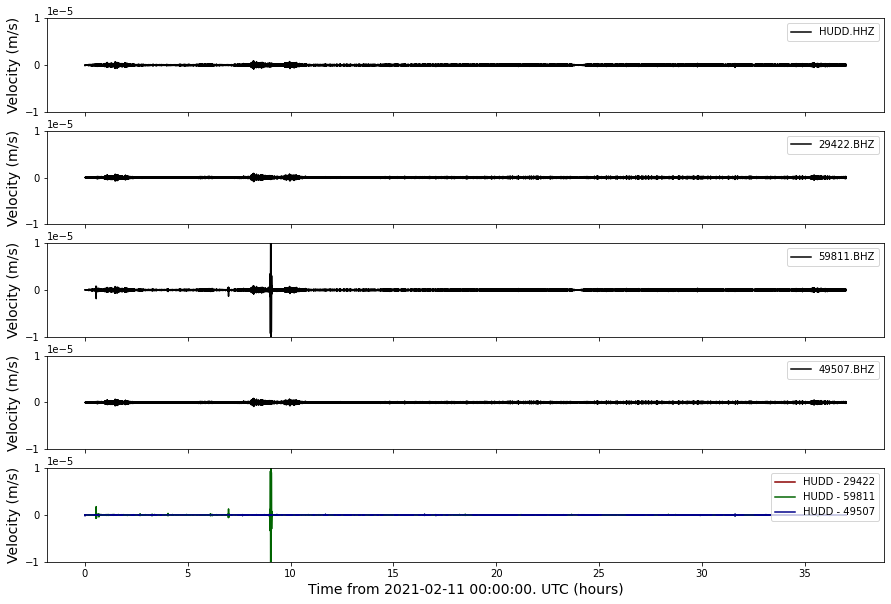

In [14]:
__plot(Z)

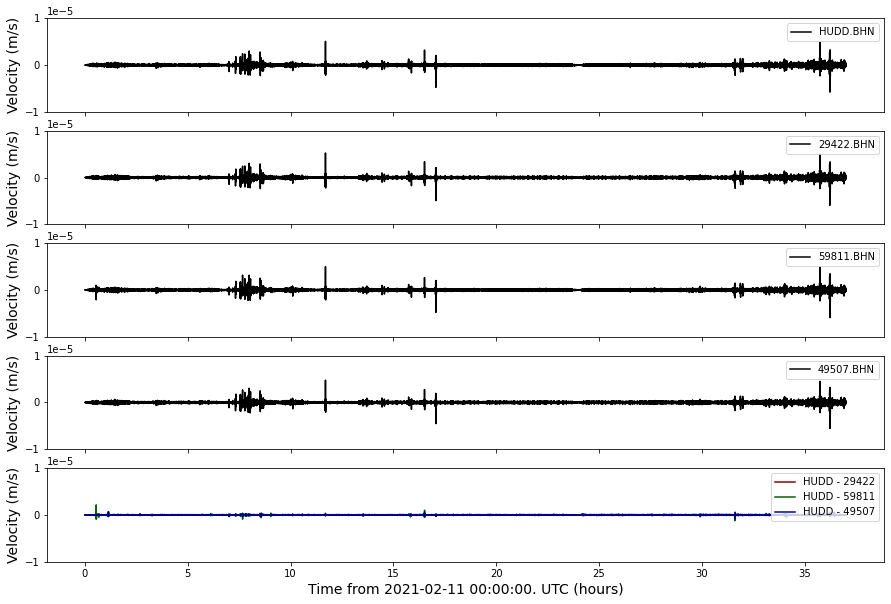

In [15]:
__plot(N)

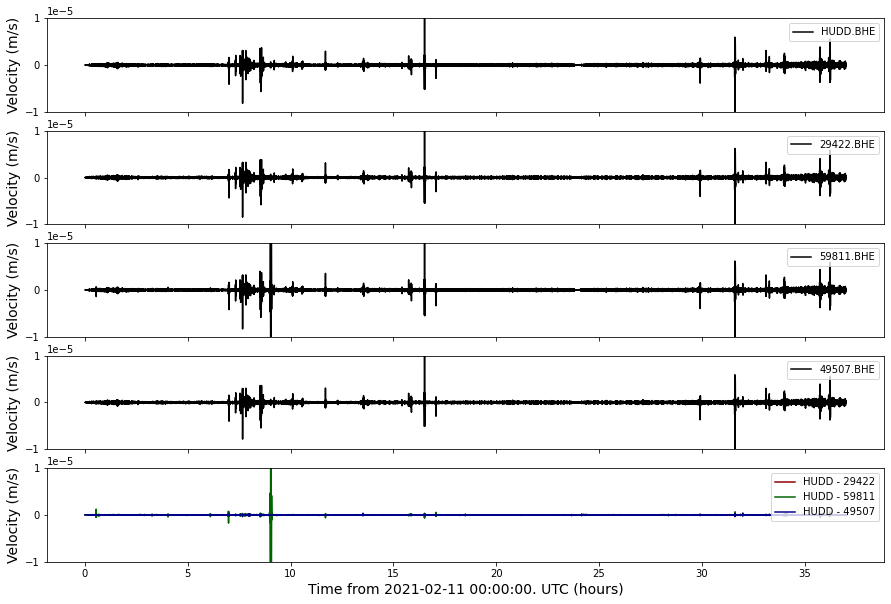

In [16]:
__plot(E)